$\def \dot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \adot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \cD {\mathcal{D}}$
$\def \cM {\mathcal{M}}$
$\def \bc {\mathbf{c}}$
$\def \bv {\mathbf{v}}$
$\def \bG {\mathbf{G}}$

# How close does domain decomposition come to describing the manifold of solutions $\cM$?

In ```03_greedy_2d_manifold``` we consider the solutions of the PDE $u_h(a(y))$ where $y\in\mathbb{R}^2$, $a(y) = y_1 \chi_{D_1}(x) + y_2 \chi_{D_2}(x)$, and $D_1 = [0,1/2) \times [0,1]$ and $D_2 = [1/2, 1] \times [0,1]$, and $\chi_{D_1}$, $\chi_{D_2}$ are the indicator functions on $D_1$, $D_2$.

We saw that the solution manifold $\cM = \{u(a(y)) : y\in U=[0,1]^2\}$ was contained in a 3 dimensional space spanned by the subdomain solutions on $D$, $D_1$ and $D_2$.

### Showing that $\cM$ is spanned by 3 solutions

The demonstration is a reasonably straightforward solution inspired by the results of the greedy algorithm in the  ```03_greedy_2d_manifold``` worksheet. We have 
$$
a(y) = \bar{a} + c(y_1 \chi_{D_1} + y_2 \chi_{D_2})
$$

We define the operators $A_0$, $A_1$ and $A_2$ in the inner product
$$
\dot{A_0 u}{v}_V = \int_D \nabla u \cdot \nabla v \, \mathrm{d} x
$$
and
$$
\dot{A_1 u}{v}_V = \int_{D} \chi_{D_1} \nabla u \cdot \nabla v \, \mathrm{d} x = \int_{D_1} \nabla u \cdot \nabla v \, \mathrm{d} x
$$
and similar for $A_2$. Recall that $V=H_0^1(D)$. Now let us assume that both $a$ is constant. We can re-write the PDE problem in its weak form as

$$
\left ( \bar{a}A_0 + c y_1 A_1 + c y_2 A_2 \right) u = f
$$

The essence of the is to see that we can pull out the "scale" of the field out the front, and we are left with one more parameter which is the amount of difference in the field between $D_1$ and $D_2$, that is,
$$
a(y_1, y_2) = a(y_m, y_d) = y_m \left( 1 + y_d (\chi_{D_1} - \chi_{D_2}) \right)
$$
where we have defined 
$$
y_m = \bar{a} + c\frac{y_1 + y_2}{2} \quad \text{and} \quad y_d = c \frac{y_1-y_2}{2} y_m^{-1}
$$

Now, we write $u_0\in H_0^1(D)$, $u_1\in H_0^1(D_1)$ and $u_2 \in H_0^1(D_2)$ for the solutions of 
$$
A_0 u_0 = f \quad A_1 u_1 = \chi_{D_1} f \quad A_2 u_2 = \chi_{D_2} f
$$

__Then the solution is given by__

$$
\large
u = \frac{1}{y_m} \left( u_0 - y_d \left( \frac{u_1}{1+y_d} - \frac{u_2}{1-y_d}\right)\right)
$$

This can be shown by re-writing the PDE in the weak form as

$$
y_m \left(A_0 + y_d (A_1 - A_2) \right) u = f
$$

Substituting the solution above in to this form we obtain

$$
\left(A_0 + y_d (A_1 - A_2) \right) \left( u_0 - y_d \left( \frac{u_1}{1+y_d} - \frac{u_2}{1-y_d}\right)\right)
= A_0 u_0 - y_d (A_1 - A_2) u_0 - y_d \left( \frac{A_0 u_1}{1+y_d} - \frac{A_0 u_2}{1-y_d}\right) - y_d^2 \left( \frac{A_1 u_1}{1+y_d} + \frac{A_2 u_2}{1-y_d}\right)
$$

We have used the self evident fact that $A_1 u_2 = A_2 u_1 = 0$. Now, it is straightforward to show that $A_0 u_1  = A_1 u_1$ and similar for $u_2$. This thus simplifies to 

$$
A_0 u_0 + y_d (A_1 - A_2) u_0 - y_d \left(A_1 u_1 - A_2 u_2 \right)
$$

Now we consider the symmetry in the $x_1$ coordinate. We know that $(A_1 u_0) (x_1, x_2) = (A_2 u_0) (1 - x_1, x_2)$ because of the $x_1$-axis symmetry of the problem. This implies that we must have 
$$
(A_1 - A_2) u = (\chi_{D_1} - \chi_{D_2} )f,
$$
hence that $(A_1 - A_2) u_0 = \left(A_1 u_1 - A_2 u_2 \right)$ and hence that we find our solution produces $A_0 u_0 = f$ which satisfies the PDE.

### We see that a similar approach _almost_ works for the non-symmetric cases and for higher-dimensional fields

We see that for $D_1$ and $D_2$ that are non-symmetric, $(A_1 - A_2) u_0 \neq \left(A_1 u_1 - A_2 u_2 \right)$, but the difference is small.

Can we perhaps quantify the convergence of symmetric domain decompositions in some way? Are symmetric domain decompositions perhaps a good method of decomposing a problem, in general?

In [6]:
import numpy as np
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyApproxTools as pat
importlib.reload(pat)

%matplotlib inline

def make_soln(points, fem_div, a_bar=1.0, c=0.5, f=1.0, verbose=False):
    
    solns = []
    fields = []

    for p in points:
        field = pat.PWConstantSqDyadicL2(a_bar + c * p.reshape((2,2)))
        fields.append(field)
        # Then the fem solver (there a faster way to do this all at once? This will be huge...
        fem_solver = pat.DyadicFEMSolver(div=fem_div, rand_field = field, f = 1)
        fem_solver.solve()
        solns.append(fem_solver.u)
        
    return solns, fields

### Generate the solution $u$ that we want to approximate

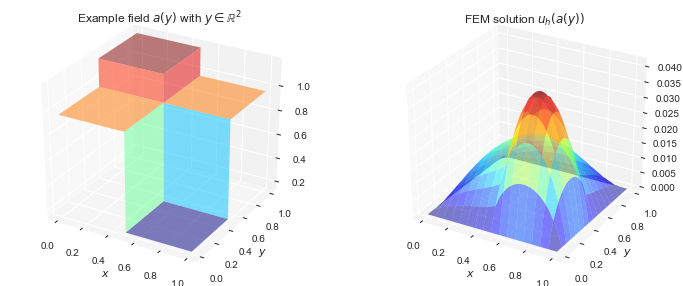

In [7]:
fem_div = 7

a_bar = 0.1
c = 2.0

np.random.seed(2)

y = np.random.random((1,4))

u, a = make_soln(y, fem_div, a_bar=a_bar, c=c)
u = u[0]
a = a[0]

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
a.plot(ax, title='Example field $a(y)$ with $y\in\mathbb{R}^2$')
ax = fig.add_subplot(1, 2, 2, projection='3d')
u.plot(ax, title='FEM solution $u_h(a(y))$')
plt.show()